# Neural Net using BitcoinHeistData

Inspired by: https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

# Load and process the data

In [1]:
import pandas as pd
df = pd.read_csv('BitcoinHeistData.csv')
df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


Split the dataset into our input features (X) and the label (Y) we wish to predict.

In [2]:
import numpy as np

X=df.iloc[:, 1:9]
Ytmp=df.iloc[:, -1]

print(X.shape)
print(Ytmp.shape)

print(X)
print(Ytmp)

# Convert the label to true false for simplicity (True==white, False==heist)
Y = Ytmp.str.contains('white')
print(Y)
numWhite = np.count_nonzero(Y)
print(numWhite/len(Y))

(2916697, 8)
(2916697,)
         year  day  length     weight  count  looped  neighbors        income
0        2017   11      18   0.008333      1       0          2  1.000500e+08
1        2016  132      44   0.000244      1       0          1  1.000000e+08
2        2016  246       0   1.000000      1       0          2  2.000000e+08
3        2016  322      72   0.003906      1       0          2  7.120000e+07
4        2016  238     144   0.072848    456       0          1  2.000000e+08
...       ...  ...     ...        ...    ...     ...        ...           ...
2916692  2018  330       0   0.111111      1       0          1  1.255809e+09
2916693  2018  330       0   1.000000      1       0          1  4.409699e+07
2916694  2018  330       2  12.000000      6       6         35  2.398267e+09
2916695  2018  330       0   0.500000      1       0          1  1.780427e+08
2916696  2018  330     144   0.073972   6800       0          2  1.123500e+08

[2916697 rows x 8 columns]
0          p

Normalize the data so one feature does not dominate.
Use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [3]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[8.57142857e-01, 2.74725275e-02, 1.25000000e-01, ...,
        0.00000000e+00, 7.74053719e-05, 1.40199911e-06],
       [7.14285714e-01, 3.59890110e-01, 3.05555556e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.40099840e-06],
       [7.14285714e-01, 6.73076923e-01, 0.00000000e+00, ...,
        0.00000000e+00, 7.74053719e-05, 3.40242469e-06],
       ...,
       [1.00000000e+00, 9.03846154e-01, 1.38888889e-02, ...,
        4.13907285e-04, 2.63178265e-03, 4.73991240e-05],
       [1.00000000e+00, 9.03846154e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.96296491e-06],
       [1.00000000e+00, 9.03846154e-01, 1.00000000e+00, ...,
        0.00000000e+00, 7.74053719e-05, 1.64817455e-06]])

Split the dataset for a validation set and a test set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2041687, 8) (437505, 8) (437505, 8) (2041687,) (437505,) (437505,)


# Build and train Naive Bayes

In [5]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_predGNB = gnb.fit(X_train, Y_train).predict(X_test)
numWrongGNB = (Y_test != y_predGNB).sum()
print("Number of mislabeled test points = " + str(numWrongGNB) + " or " + str(numWrongGNB/437505))

Number of mislabeled test points = 298966 or 0.6833430475080284


In [6]:
# Nultinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(X_train, Y_train)
print("score on test: " + str(mnb.score(X_test, Y_test)))
print("score on train: "+ str(mnb.score(X_train, Y_train)))

score on test: 0.9856413069564919
score on train: 0.9858474878862431


# Build and train Logistic Regression

In [7]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
print("score on test: " + str(lr.score(X_test, Y_test)))
print("score on train: "+ str(lr.score(X_train, Y_train)))

score on test: 0.9856413069564919
score on train: 0.9858474878862431


# Build and train a Neural Network

Use Keras to build the neural net.

In [8]:
from keras.models import Sequential
from keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [9]:
modelNN = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [10]:
modelNN.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [11]:
# We usually train with more epochs (~100), but each epoch same here (issue?)
hist = modelNN.fit(X_train, Y_train,
          batch_size=32, epochs=5,
          validation_data=(X_val, Y_val))

Epoch 1/5
63803/63803 [==============================] - 35s 467us/step - loss: 0.0816 - accuracy: 0.9855 - val_loss: 0.0725 - val_accuracy: 0.9857
Epoch 2/5
63803/63803 [==============================] - 30s 468us/step - loss: 0.0714 - accuracy: 0.9859 - val_loss: 0.0702 - val_accuracy: 0.9857
Epoch 3/5
63803/63803 [==============================] - 30s 469us/step - loss: 0.0697 - accuracy: 0.9858 - val_loss: 0.0684 - val_accuracy: 0.9857
Epoch 4/5
63803/63803 [==============================] - 30s 467us/step - loss: 0.0678 - accuracy: 0.9859 - val_loss: 0.0677 - val_accuracy: 0.9857
Epoch 5/5
63803/63803 [==============================] - 30s 469us/step - loss: 0.0672 - accuracy: 0.9859 - val_loss: 0.0674 - val_accuracy: 0.9857


Evaluating our NN model on the test set:

In [12]:
modelNN.evaluate(X_test, Y_test)[1]
y_predNN = modelNN.predict(X_test)

13673/13673 [==============================] - 4s 317us/step - loss: 0.0679 - accuracy: 0.9856


In [13]:
print(type(y_predNN))
print(y_predNN)
print(np.unique(y_predNN))
print(np.amin(y_predNN))

# Convert probabilities to 0/1 to represent classes True/False
y_classes = np.round(y_predNN)
print(y_classes)
print(np.unique(y_classes[0]))
print(type(y_classes[0][0]))

<class 'numpy.ndarray'>
[[0.9995408 ]
 [0.97968364]
 [0.9991926 ]
 ...
 [0.95137215]
 [0.9903852 ]
 [0.9999464 ]]
[0.94172037 0.9417311  0.94178313 ... 0.99994934 0.9999494  0.99994946]
0.94172037
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[1.]
<class 'numpy.float32'>


# Visualizing Loss and Accuracy

In [14]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

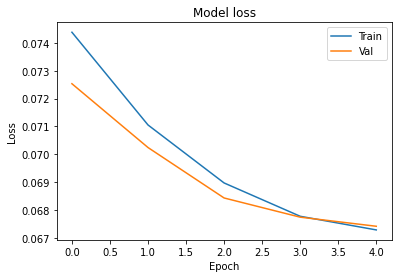

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

print(hist.history.keys())

We can also visualize the training accuracy and the validation accuracy like this:

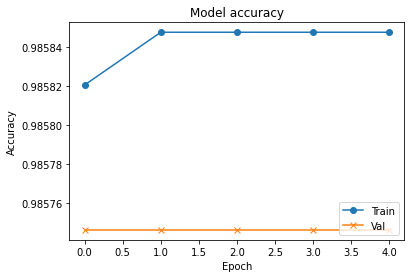

In [16]:
plt.plot(hist.history['accuracy'], '-o')
plt.plot(hist.history['val_accuracy'], '-x')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.ylim(0.95, 1)
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [17]:
print(X_test.shape)
print(Y_test.shape)
print(type(X_test))
print(type(Y_test))
print(hist.params)
print(hist.history.keys())

# Look at results where label is not 'white'.  Do we ever predict a heist?
#print(X_test[1,:])
#fooY = Y_test.to_numpy()
#print(fooY[1])
#idxWhite = np.where(Y_test)[0]
#print(type(idxWhite))
#print(idxWhite.shape)
#model.evaluate(X_test[idxWhite,:], Y_test[idxWhite])

#for i in range(X_test):
#    xt = X_test[i]
#    yt = Y_test[i]
#    model.evaluate(xt, yt)[1]
#    break;

(437505, 8)
(437505,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
{'verbose': 1, 'epochs': 5, 'steps': 63803}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [18]:
# Random forests\n",
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
modelRF = RandomForestClassifier()
modelRF.fit(X_train, Y_train)

RandomForestClassifier()

In [19]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelRF, X_val, Y_val, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

y_predRF = modelRF.predict(X_test)
y_predRF.astype(int)
print(y_predRF)
print(np.unique(y_predRF))


Accuracy: 0.986 (0.000)
[ True  True  True ...  True  True  True]
[False  True]


In [20]:
print(type(y_predRF))
print(type(Y_test))
print(type(y_predRF[0]))
print(y_predRF.shape)
print(Y_test.shape)

Y_test_np = Y_test.to_numpy()
print(y_predRF[3])
print(Y_test_np[3])

numTrue = np.count_nonzero(Y_test_np == True)
numFalse = np.count_nonzero(Y_test_np == False)
print("Number in test set=True  is " + str(numTrue))
print("Number in test set=False is " + str(numFalse))

numCorrect=0
numIncorrect=0
tp = 0
tn = 0
fp = 0
fn = 0
for idx in range(0, y_predRF.size-1):
    if y_predRF[idx] == Y_test_np[idx]:
        numCorrect = numCorrect + 1
    else:
        numIncorrect = numIncorrect + 1
    if y_predRF[idx] == True and Y_test_np[idx] == True:
        tp = tp + 1
    elif y_predRF[idx] == False and Y_test_np[idx] == False:
        tn = tn + 1
    elif y_predRF[idx] == True and Y_test_np[idx] == False:
        fp = fp + 1
    elif y_predRF[idx] == False and Y_test_np[idx] == True:
        fn = fn + 1

print("numCorrect (T & F)   =" + str(numCorrect))
print("numIncorrect (T & F) =" + str(numIncorrect))
print("Of white samples, RF correctly identified " + str(tp) + " or " + str(tp/numTrue))
print("Of heist samples, RF correctly identified " + str(tn) + " or " + str(tn/numFalse))

print("------------------")
print("tp   =" + str(tp))
print("tn   =" + str(tn))
print("fp   =" + str(fp))
print("fn   =" + str(fn))

print("\nFrom class notes:")
print("  Accuracy     =" + str((tp+tn)/(tp+tn+fp+fn)))
print("  precision=" + str(tp/(tp+fp)))
print("  recall   =" + str(tp/(tp+fn)))
print("  F1       =" + str(2*tp/(2*tp+fp+fn)))

from sklearn.metrics import precision_recall_fscore_support
print('\nFrom sklearn metrics:')
print("  Precision, Recall, Fscore [macro, micro, weighted]: ")
print("  " + str(precision_recall_fscore_support(y_predRF, Y_test_np, average='macro')))
print("  " + str(precision_recall_fscore_support(y_predRF, Y_test_np, average='micro')))
print("  " + str(precision_recall_fscore_support(y_predRF, Y_test_np, average='weighted')))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.bool_'>
(437505,)
(437505,)
True
True
Number in test set=True  is 431223
Number in test set=False is 6282
numCorrect (T & F)   =431579
numIncorrect (T & F) =5925
Of white samples, RF correctly identified 430942 or 0.999348364999084
Of heist samples, RF correctly identified 637 or 0.10140082776185928
------------------
tp   =430942
tn   =637
fp   =5645
fn   =280

From class notes:
  Accuracy     =0.986457266676419
  precision=0.987070160128451
  recall   =0.9993506824790943
  F1       =0.9931724607603747

From sklearn metrics:
  Precision, Recall, Fscore [macro, micro, weighted]: 
  (0.5503757558733559, 0.8408633391468625, 0.5850707499854704, None)
  (0.9864572976308842, 0.9864572976308842, 0.9864572976308842, None)
  (0.9974686025957107, 0.9864572976308842, 0.9914617336092755, None)


# Build and train a different Neural Network

In [21]:
import tensorflow as tf
from keras import regularizers

modelNN2=Sequential()
modelNN2.add(Dense(8,kernel_regularizer=regularizers.l2(0.003),activation='relu',input_shape=(8,)))
modelNN2.add(tf.keras.layers.Dropout(0.5))
modelNN2.add(Dense(8,kernel_regularizer=regularizers.l2(0.003),activation='relu'))
modelNN2.add(tf.keras.layers.Dropout(0.6))
modelNN2.add(Dense(1,activation='sigmoid'))
modelNN2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

modelNN2.fit(X_train, Y_train, epochs=4, batch_size=512, validation_data=(X_val, Y_val))
print("score on test: " + str(modelNN2.evaluate(X_test, Y_test)[1]))
print("score on train: "+ str(modelNN2.evaluate(X_train, Y_train)[1]))

Epoch 1/4
3988/3988 [==============================] - 3s 605us/step - loss: 0.2513 - accuracy: 0.9734 - val_loss: 0.0749 - val_accuracy: 0.9857
Epoch 2/4
3988/3988 [==============================] - 2s 575us/step - loss: 0.0750 - accuracy: 0.9858 - val_loss: 0.0747 - val_accuracy: 0.9857
Epoch 3/4
3988/3988 [==============================] - 2s 574us/step - loss: 0.0742 - accuracy: 0.9859 - val_loss: 0.0747 - val_accuracy: 0.9857
Epoch 4/4
13673/13673 [==============================] - 4s 306us/step - loss: 0.0752 - accuracy: 0.9856
score on test: 0.9856413006782532
63803/63803 [==============================] - 20s 309us/step - loss: 0.0743 - accuracy: 0.9858s - loss: 0.0
score on train: 0.9858474731445312


# Use voting classifier to combine models

In [22]:
from sklearn.ensemble import VotingClassifier

# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf

evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',modelRF)],voting='hard')
evc.fit(X_train, Y_train)
print("score on test: " + str(evc.score(X_test, Y_test)))
print("score on train: "+ str(evc.score(X_train, Y_train)))

score on test: 0.9856413069564919
score on train: 0.9858474878862431
